In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('spam.csv', encoding = 'latin-1')
data = data.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(
    df.v2,
    df.v1, 
    test_size=0.2, 
    random_state=0) 
print(data_train.shape, data_test.shape, labels_train.shape, labels_test.shape)

(4457,) (1115,) (4457,) (1115,)


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

data_train_count = vectorizer.fit_transform(data_train)
data_test_count  = vectorizer.transform(data_test)

# print(train_count.toarray()[0:4])
print(train_count.shape, test_count.shape)


(4457, 7612) (1115, 3690)


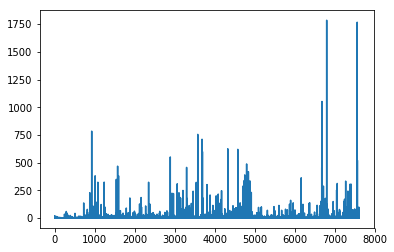

,term,occurrence
6799,to,1785
7562,you,1767
6681,the,1052
923,and,784
3575,in,755


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

occurrence = train_count.toarray().sum(axis = 0)
plt.plot(occurrence)
plt.show()

# 按照每个词出现的次数从高到低进行排序, get_feature_names其实就是访问vocabulary_
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrence':occurrence})
word_freq_df_sort = word_freq_df.sort_values(by=['occurrence'], ascending=False)
word_freq_df_sort.head()

In [27]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(data_train_count, labels_train)
predictions = clf.predict(data_test_count)
print(predictions)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [28]:
from sklearn.metrics import accuracy_score

print (accuracy_score(labels_test, predictions))

0.9874439461883409


In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(labels_test, predictions))
print (confusion_matrix(labels_test, predictions))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       949
        spam       0.99      0.93      0.96       166

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

[[947   2]
 [ 12 154]]


In [30]:
from sklearn.model_selection import cross_val_score

data_content = df.v2
data_label = df.v1
vect = CountVectorizer()

data_count = vect.fit_transform(data_content)

cross_val = cross_val_score(clf, data_count, data_label, cv=20, scoring='accuracy')

print (cross_val)
print (np.mean(cross_val))

[0.975      0.99642857 0.98928571 0.975      0.98214286 0.97132616
 0.99641577 0.97482014 0.97482014 0.98201439 0.97841727 0.98201439
 0.97482014 0.98920863 0.98561151 0.98201439 0.94964029 0.99280576
 0.98920863 0.98561151]
0.9813303136292808
